In [340]:

import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt

from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_X_y

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [341]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [342]:
ml = pd.read_csv('ml.csv')
feat = ml.drop(['Unnamed: 0', 'TIME W/ CUTS', 'NODES W/ CUTS', 'TIME W/O CUTS', 'NODES W/O CUTS'], axis=1)
feat

NAME  RANDOM SEED    INITIAL LP  \
0                        10teams.mps.gz            2  2.000000e+01   
1                        10teams.mps.gz            4  2.000000e+01   
2                        10teams.mps.gz            8  2.000000e+01   
3                        10teams.mps.gz           16  2.000000e+01   
4                        10teams.mps.gz           32  2.000000e+01   
5                          22433.mps.gz            2  2.124053e+04   
6                          22433.mps.gz            4  2.124053e+04   
7                          22433.mps.gz            8  2.124053e+04   
8                          22433.mps.gz           16  2.124053e+04   
9                          22433.mps.gz           32  2.124053e+04   
10                         23588.mps.gz            2  7.649866e+03   
11                         23588.mps.gz            4  7.649866e+03   
12                         23588.mps.gz            8  7.649866e+03   
13                         23588.mps.gz           16  7.649866e+03   
14                         23588.mps.gz           32  7.649866e+03   
15               30_70_45_05_100.mps.gz            2 -5.336000e+03   
16               30_70_45_05_100.mps.gz            4 -5.336000e+03   
17               30_70_45_05_100.mps.gz            8 -5.336000e+03   
18               30_70_45_05_100.mps.gz           16 -5.336000e+03   
19               30_70_45_05_100.mps.gz           32 -5.336000e+03   
20              30_70_45_095_100.mps.gz            2 -6.132000e+03   
21              30_70_45_095_100.mps.gz            4 -6.132000e+03   
22              30_70_45_095_100.mps.gz            8 -6.132000e+03   
23              30_70_45_095_100.mps.gz           16 -6.132000e+03   
24              30_70_45_095_100.mps.gz           32 -6.132000e+03   
25               30_70_45_095_98.mps.gz            2 -5.967000e+03   
26               30_70_45_095_98.mps.gz            4 -5.967000e+03   
27               30_70_45_095_98.mps.gz            8 -5.967000e+03   
28               30_70_45_095_98.mps.gz           16 -5.967000e+03   
29               30_70_45_095_98.mps.gz           32 -5.967000e+03   
30                       30n20b8.mps.gz            2  1.070984e+02   
31                       30n20b8.mps.gz            4  1.070984e+02   
32                       30n20b8.mps.gz            8  1.070984e+02   
33                       30n20b8.mps.gz           16  1.070984e+02   
34                       30n20b8.mps.gz           32  1.070984e+02   
35                      CMS750_4.mps.gz            2  2.500000e+02   
36                      CMS750_4.mps.gz            4  2.500000e+02   
37                      CMS750_4.mps.gz            8  2.500000e+02   
38                      CMS750_4.mps.gz           16  2.500000e+02   
39                      CMS750_4.mps.gz           32  2.500000e+02   
40                         Test3.mps.gz            2  2.241736e+06   
41                         Test3.mps.gz            4  2.241736e+06   
42                         Test3.mps.gz            8  2.241736e+06   
43                         Test3.mps.gz           16  2.241736e+06   
44                         Test3.mps.gz           32  2.241736e+06   
45                   ab51-40-100.mps.gz            2 -3.998180e+12   
46                   ab51-40-100.mps.gz            4 -3.998180e+12   
47                   ab51-40-100.mps.gz            8 -3.998180e+12   
48                   ab51-40-100.mps.gz           16 -3.998180e+12   
49                   ab51-40-100.mps.gz           32 -3.998180e+12   
50                   ab67-40-100.mps.gz            2 -4.706400e+12   
51                   ab67-40-100.mps.gz            4 -4.706400e+12   
52                   ab67-40-100.mps.gz            8 -4.706400e+12   
53                   ab67-40-100.mps.gz           16 -4.706400e+12   
54                   ab67-40-100.mps.gz           32 -4.706400e+12   
55                   ab69-40-100.mps.gz            2 -4.636150e+12   
56                   ab69-40-100.mps.gz      

In [343]:
X = feat.iloc[0:, 0:-2]
# X = X.astype(np.float64)
y = feat.iloc[0:, -2]
# y = y.astype(np.float64)

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train = X_train.drop(['NAME', 'RANDOM SEED'], axis = 1)
X_test = X_test.drop(['NAME', 'RANDOM SEED'], axis = 1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1704, 22) (426, 22)
(1704,) (426,)


In [345]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [346]:
cols = feat.iloc[0:, 2:-2]

bestfeatures = SelectKBest(score_func=f_classif, k = 'all')
fit = bestfeatures.fit(X_train,y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(cols.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(22,'Score')) #print best features
data=featureScores.nlargest(22,'Score')

             Features      Score
16          nonzeroes  22.919990
17            obj_dyn  19.813158
18      dynamism_mean  13.352409
1     PRESOLVING TIME   7.966677
15   linmixbin_constr   6.307941
0          INITIAL LP   6.069777
10     lincard_constr   5.446756
12  linbinpack_constr   3.629570
8   linsetpack_constr   2.326240
5           cont_vars   1.624400
3            bin_vars   1.602365
7   linsetpart_constr   1.598134
19        presol_vars   1.456141
2                vars   1.398210
4            int_vars   0.429321
21      presol_constr   0.134598
6              constr   0.110167
11   lineqknap_constr   0.102906
14  linintknap_constr   0.059046
13    linknaps_constr   0.010188
9    linsetcov_constr   0.000459
20    presol_int_vars   0.000163


<AxesSubplot:ylabel='Features'>

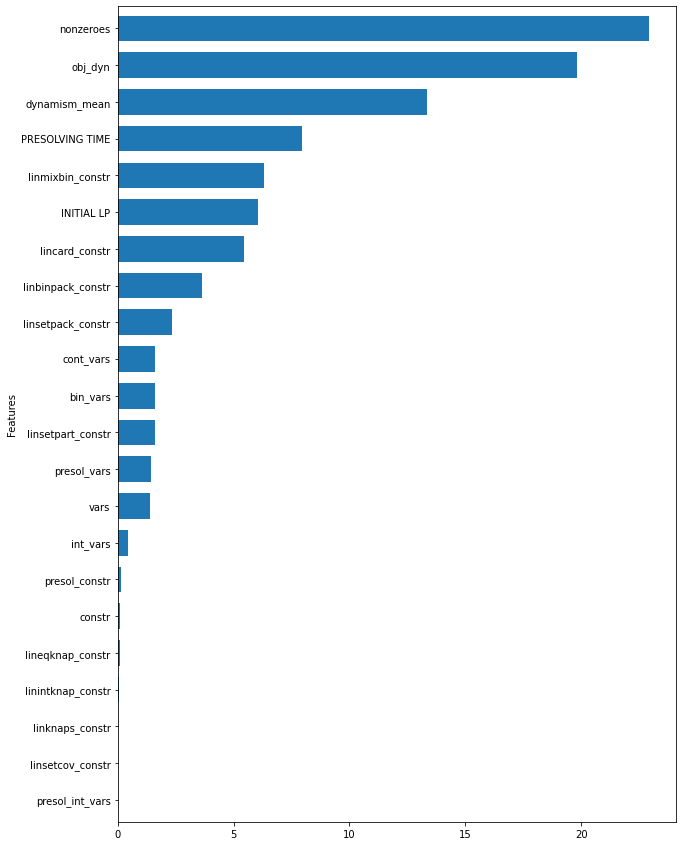

In [347]:
features = data.copy().set_index('Features') 
features = features.iloc[::-1]
features.plot.barh(width = 0.7, figsize=(10,15), legend=None)

In [348]:
X = feat.drop(['Time Label','Nodes Label', 'presol_int_vars', 'linsetcov_constr', 'linknaps_constr',
                 'linintknap_constr', 'lineqknap_constr', 'constr', 'presol_constr', 'int_vars'], axis = 1)

y = y = feat.iloc[0:, -2]

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

test_df = X_test.copy()
train_df = X_train.copy()

X_train = X_train.drop(['NAME', 'RANDOM SEED'], axis = 1)
X_test = X_test.drop(['NAME', 'RANDOM SEED'], axis = 1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1704, 14) (426, 14)
(1704,) (426,)


In [350]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [259]:
model_params={'svm':{'model': SVC(kernel = 'rbf', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]
                             }
                    },
              'rfm':{'model': RandomForestClassifier(random_state = 0), 
                    'params':{'n_estimators':[100, 200, 500], 
                             'max_depth':[5, 10, 15]
                             }
                    },
              'lrm':{'model': LogisticRegression(solver='lbfgs', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 
                              'max_iter':[100, 500, 1000]
                             }
                    },
              'et':{'model': ExtraTreesClassifier(random_state=0), 
                    'params':{'n_estimators': [100, 200, 500], 
                              'max_depth': [5, 10, 15]
                             }
                    },
              'nn':{'model': MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', 
                                           power_t=0.5, max_iter=500, shuffle=True, tol=0.00001, verbose=True, 
                                           early_stopping=False, validation_fraction=0.1, random_state=0),
                    'params':{'hidden_layer_sizes': [(5, ), (10, ), (15, )],
                                 'learning_rate_init': [1e-1, 1e-2, 1e-3],
                                 'alpha':  [1e-2, 1e-3, 1e-4],
                                 'activation': ['tanh', 'relu', 'logistic']
                             }
                    }
             }
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv = None, return_train_score = False, n_jobs = -1)
    clf.fit(X_train, y_train)
    scores.append({'model': model_name, 'best_score':clf.best_score_, 'best_params':clf.best_params_})

C:\Users\ambar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [260]:
scores=pd.DataFrame(scores).sort_values(by = ['best_score'], ascending = False)
scores.to_csv('scores.csv')

In [351]:
scores = OrderedDict()
target_names = ['-1', '1']

print('SUPPORT VECTOR MACHINES')
clf = SVC(random_state = 0, C = 1000, gamma = 0.01, kernel = 'rbf')
clf.fit(X_train, y_train)
y_train_pred_svm = clf.predict(X_train)
y_test_pred_svm = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_svm)
mse_test = mean_squared_error(y_test, y_test_pred_svm)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_svm, target_names=target_names))
scores['SVC'] = [score, metrics.precision_score(y_test, y_test_pred_svm), metrics.recall_score(y_test, y_test_pred_svm),
                      metrics.f1_score(y_test, y_test_pred_svm), mse_test, mse_train]

print('##################################')
print('NEURAL NETWORKS')
clf = MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', power_t=0.5, max_iter=500, 
                    shuffle=True, tol=0.00001, verbose=True, 
                    early_stopping=False, validation_fraction=0.1,
                    hidden_layer_sizes=(15, ), activation='tanh', alpha=0.001, 
                    learning_rate_init=0.1, random_state=0)
clf.fit(X_train, y_train)
y_train_pred_nn = clf.predict(X_train)
y_test_pred_nn = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_nn)
mse_test = mean_squared_error(y_test, y_test_pred_nn)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_nn, target_names=target_names))
scores['NN'] = [score, metrics.precision_score(y_test, y_test_pred_nn), metrics.recall_score(y_test, y_test_pred_nn),
                      metrics.f1_score(y_test, y_test_pred_nn), mse_test, mse_train]

print('##################################')
print('DECISION TREES')
clf = ExtraTreesClassifier(random_state=0, max_depth = 15, n_estimators = 100)
clf.fit(X_train, y_train)
y_train_pred_et = clf.predict(X_train)
y_test_pred_et = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_et)
mse_test = mean_squared_error(y_test, y_test_pred_et)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_et, target_names=target_names))
scores['ET'] = [score, metrics.precision_score(y_test, y_test_pred_et), 
                         metrics.recall_score(y_test, y_test_pred_et), 
                         metrics.f1_score(y_test, y_test_pred_et), mse_test, mse_train]

print('##################################')
print('LOGISTIC REGRESSION')
clf = LogisticRegression(solver='lbfgs', random_state = 0, C = 1000, max_iter = 100)
clf.fit(X_train, y_train)
y_train_pred_lr = clf.predict(X_train)
y_test_pred_lr = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_lr)
mse_test = mean_squared_error(y_test, y_test_pred_lr)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_lr, target_names=target_names))
scores['LR'] = [score, metrics.precision_score(y_test, y_test_pred_lr), metrics.recall_score(y_test, y_test_pred_lr),
                      metrics.f1_score(y_test, y_test_pred_lr), mse_test, mse_train]

print('##################################')
print('RANDOM FOREST')
clf = RandomForestClassifier(random_state = 0, max_depth = 15, n_estimators = 200 )
clf.fit(X_train, y_train)
y_train_pred_rf = clf.predict(X_train)
y_test_pred_rf = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_rf)
mse_test = mean_squared_error(y_test, y_test_pred_rf)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))
scores['RF'] = [score, metrics.precision_score(y_test, y_test_pred_rf), metrics.recall_score(y_test, y_test_pred_rf),
                      metrics.f1_score(y_test, y_test_pred_rf), mse_test, mse_train]

SUPPORT VECTOR MACHINES
MSE Test: 1.0046948356807512, MSE Train: 0.755868544600939
Accuracy score: 0.7488262910798122

              precision    recall  f1-score   support

          -1       0.72      0.69      0.70       185
           1       0.77      0.80      0.78       241

    accuracy                           0.75       426
   macro avg       0.74      0.74      0.74       426
weighted avg       0.75      0.75      0.75       426

##################################
NEURAL NETWORKS


C:\Users\ambar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MSE Test: 0.29107981220657275, MSE Train: 0.20422535211267606
Accuracy score: 0.9272300469483568

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92       185
           1       0.95      0.92      0.93       241

    accuracy                           0.93       426
   macro avg       0.92      0.93      0.93       426
weighted avg       0.93      0.93      0.93       426

##################################
DECISION TREES
MSE Test: 0.2347417840375587, MSE Train: 0.07511737089201878
Accuracy score: 0.9413145539906104

              precision    recall  f1-score   support

          -1       0.93      0.93      0.93       185
           1       0.95      0.95      0.95       241

    accuracy                           0.94       426
   macro avg       0.94      0.94      0.94       426
weighted avg       0.94      0.94      0.94       426

##################################
LOGISTIC REGRESSION
MSE Test: 1.7370892018779343, MSE Train: 1.577

In [352]:
scores_df = pd.DataFrame.from_dict(scores, orient='index')
scores_df.columns=['accuracy', 'precision', 'recall', 'f1-score', 'mse test', 'mse train']
scores_df

accuracy  precision    recall  f1-score  mse test  mse train
SVC  0.748826   0.768000  0.796680  0.782077  1.004695   0.755869
NN   0.927230   0.948718  0.921162  0.934737  0.291080   0.204225
ET   0.941315   0.946281  0.950207  0.948240  0.234742   0.075117
LR   0.565728   0.595890  0.721992  0.652908  1.737089   1.577465
RF   0.969484   0.967213  0.979253  0.973196  0.122066   0.002347

Text(0.5, 1.0, 'MSE')

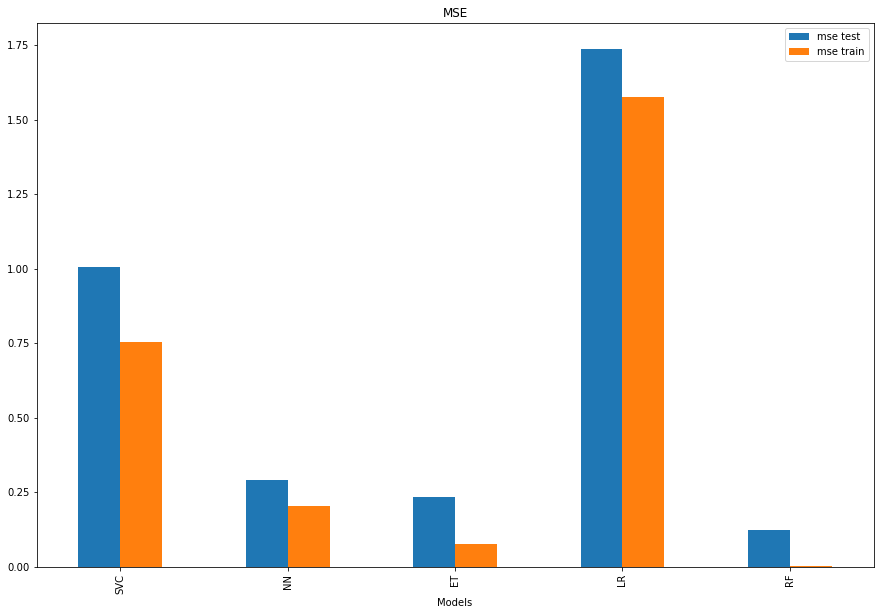

In [353]:
errors_df = scores_df.filter(['mse test', 'mse train'])
errors_df.plot.bar(width = 0.5, figsize=(15,10))
plt.xlabel("Models")
plt.title('MSE')

Text(0.5, 1.0, 'Accuracy Score')

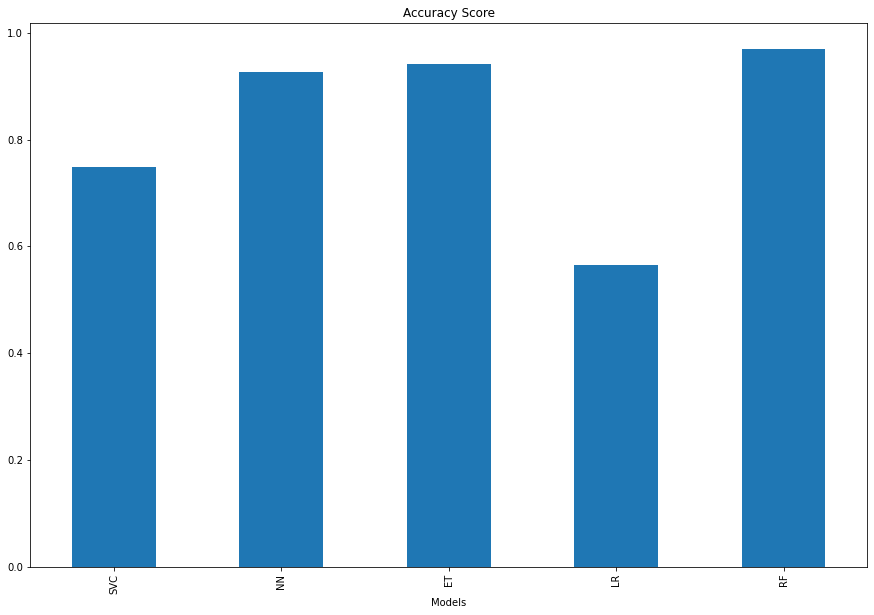

In [354]:
accuracy_df = scores_df.filter(['accuracy'])
accuracy_df.plot.bar(width = 0.5, figsize=(15,10), legend = None)
plt.xlabel("Models")
plt.title('Accuracy Score')

ANALYSIS ON TEST DATA

In [355]:
test_df['PLabel NN'] = y_test_pred_nn
test_df['PLabel ET'] = y_test_pred_et
test_df['PLabel RF'] = y_test_pred_rf
analysis = test_df.loc[test_df.NAME.isin(ml.NAME)]
analysis = analysis.sort_values(by = ['NAME'])
analysis = analysis.merge(ml, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis = analysis.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'PLabel NN', 'PLabel ET', 'PLabel RF', 'Time Label'])
analysis['Minimum Time'] = analysis[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis['Minimum Nodes'] = analysis[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis

NAME  RANDOM SEED  TIME W/ CUTS  \
0                       10teams.mps.gz            4     11.186637   
1                         22433.mps.gz           32      2.530001   
2                         22433.mps.gz            4      2.531652   
3               30_70_45_05_100.mps.gz           16    282.130789   
4               30_70_45_05_100.mps.gz            2    282.391689   
5               30_70_45_05_100.mps.gz            8    282.933251   
6              30_70_45_095_100.mps.gz           16    725.330345   
7               30_70_45_095_98.mps.gz            8     76.030644   
8                       30n20b8.mps.gz            4    153.154792   
9                       30n20b8.mps.gz            2    152.822754   
10                      30n20b8.mps.gz           32    150.433493   
11                     CMS750_4.mps.gz           32  18000.330780   
12                     CMS750_4.mps.gz            8  18000.639920   
13                  ab51-40-100.mps.gz            8    708.971868   
14                  ab51-40-100.mps.gz           16    697.520564   
15                  ab67-40-100.mps.gz           16    296.982204   
16                  ab69-40-100.mps.gz            8    371.064123   
17                   acc-tight2.mps.gz            2     15.850001   
18                   acc-tight4.mps.gz            4    219.634273   
19                   acc-tight4.mps.gz            8    218.430362   
20                   acc-tight5.mps.gz            2    284.217872   
21                     aflow30a.mps.gz            2     29.466006   
22                        air03.mps.gz           16      2.521099   
23                        air05.mps.gz            8     53.581035   
24                       app1-1.mps.gz           16      7.718072   
25                       app1-2.mps.gz           32   1067.190473   
26                       app2-2.mps.gz           16      1.435286   
27                         app3.mps.gz            2      5.535497   
28                      arki001.mps.gz           32  18001.405890   
29                   atlanta-ip.mps.gz            2  15642.552630   
30                   atlanta-ip.mps.gz           16  15309.828600   
31                         bab5.mps.gz            4  13537.852660   
32                           bc.mps.gz            8    413.968338   
33                           bc.mps.gz            4    414.236194   
34                       beavma.mps.gz            2      1.341286   
35                      biella1.mps.gz            8   1008.228148   
36                      bienst1.mps.gz            8    197.751175   
37                      bienst2.mps.gz           32    768.630531   
38                      bienst2.mps.gz            4    693.434307   
39                       blend2.mps.gz            2      2.391351   
40                     bley_xl1.mps.gz            4     25.533108   
41                       bmocbd.mps.gz            2     47.924642   
42                      bmocbd2.mps.gz            2     41.690344   
43                     bnatt400.mps.gz           32    237.512573   
44                     bppc4-08.mps.gz           16  17438.664560   
45                      brazil3.mps.gz            2  15203.555410   
46     breastcancer-regularized.mps.gz           32   2736.953198   
47     breastcancer-regularized.mps.gz            2   2562.222399   
48                      cap6000.mps.gz           16      4.142346   
49                      cap6000.mps.gz            4      4.211700   
50                      cap6000.mps.gz            8      4.153626   
51                      cap6000.mps.gz           32      4.132985   
52                      cbs-cta.mps.gz           32     34.559294   
53          chromaticindex128-5.mps.gz           32     84.652168   
54          chromaticindex128-5.mps.gz            8     78.092441   
55          chromaticindex128-5.mps.gz            2     86.714046   
56          chromaticindex512-7.mps.gz           32   4490.548322   
57          chromaticindex512-7.

In [356]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == -1.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == -1.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == -1.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
analysis['PTime RF'] = rf_pred_time
analysis['PTime NN'] = nn_pred_time
analysis['PTime ET'] = et_pred_time

analysis['PNodes RF'] = rf_pred_nodes
analysis['PNodes NN'] = nn_pred_nodes
analysis['PNodes ET'] = et_pred_nodes

analysis

NAME  RANDOM SEED  TIME W/ CUTS  \
0                       10teams.mps.gz            4     11.186637   
1                         22433.mps.gz           32      2.530001   
2                         22433.mps.gz            4      2.531652   
3               30_70_45_05_100.mps.gz           16    282.130789   
4               30_70_45_05_100.mps.gz            2    282.391689   
5               30_70_45_05_100.mps.gz            8    282.933251   
6              30_70_45_095_100.mps.gz           16    725.330345   
7               30_70_45_095_98.mps.gz            8     76.030644   
8                       30n20b8.mps.gz            4    153.154792   
9                       30n20b8.mps.gz            2    152.822754   
10                      30n20b8.mps.gz           32    150.433493   
11                     CMS750_4.mps.gz           32  18000.330780   
12                     CMS750_4.mps.gz            8  18000.639920   
13                  ab51-40-100.mps.gz            8    708.971868   
14                  ab51-40-100.mps.gz           16    697.520564   
15                  ab67-40-100.mps.gz           16    296.982204   
16                  ab69-40-100.mps.gz            8    371.064123   
17                   acc-tight2.mps.gz            2     15.850001   
18                   acc-tight4.mps.gz            4    219.634273   
19                   acc-tight4.mps.gz            8    218.430362   
20                   acc-tight5.mps.gz            2    284.217872   
21                     aflow30a.mps.gz            2     29.466006   
22                        air03.mps.gz           16      2.521099   
23                        air05.mps.gz            8     53.581035   
24                       app1-1.mps.gz           16      7.718072   
25                       app1-2.mps.gz           32   1067.190473   
26                       app2-2.mps.gz           16      1.435286   
27                         app3.mps.gz            2      5.535497   
28                      arki001.mps.gz           32  18001.405890   
29                   atlanta-ip.mps.gz            2  15642.552630   
30                   atlanta-ip.mps.gz           16  15309.828600   
31                         bab5.mps.gz            4  13537.852660   
32                           bc.mps.gz            8    413.968338   
33                           bc.mps.gz            4    414.236194   
34                       beavma.mps.gz            2      1.341286   
35                      biella1.mps.gz            8   1008.228148   
36                      bienst1.mps.gz            8    197.751175   
37                      bienst2.mps.gz           32    768.630531   
38                      bienst2.mps.gz            4    693.434307   
39                       blend2.mps.gz            2      2.391351   
40                     bley_xl1.mps.gz            4     25.533108   
41                       bmocbd.mps.gz            2     47.924642   
42                      bmocbd2.mps.gz            2     41.690344   
43                     bnatt400.mps.gz           32    237.512573   
44                     bppc4-08.mps.gz           16  17438.664560   
45                      brazil3.mps.gz            2  15203.555410   
46     breastcancer-regularized.mps.gz           32   2736.953198   
47     breastcancer-regularized.mps.gz            2   2562.222399   
48                      cap6000.mps.gz           16      4.142346   
49                      cap6000.mps.gz            4      4.211700   
50                      cap6000.mps.gz            8      4.153626   
51                      cap6000.mps.gz           32      4.132985   
52                      cbs-cta.mps.gz           32     34.559294   
53          chromaticindex128-5.mps.gz           32     84.652168   
54          chromaticindex128-5.mps.gz            8     78.092441   
55          chromaticindex128-5.mps.gz            2     86.714046   
56          chromaticindex512-7.mps.gz           32   4490.548322   
57          chromaticindex512-7.

In [357]:
testing = analysis.copy()

In [358]:
bb_classes = ['Geometric Mean']
num_bb_classes = len(bb_classes)

bucket_min = [0, 10, 100, 1000, 3600]
bucket_max = [18000, 18000, 18000, 18000, 18000]
num_buckets = len(bucket_min)
assert(len(bucket_max) == num_buckets)
bb_buckets = ['[' + str(bucket_min[j]) + ',' + str(bucket_max[j]) + ')' for j in range(num_buckets)]

bb_metrics = ['Gmean']

In [359]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [360]:
df_0 = analysis[(analysis['Minimum Time'] >= 0)]
df_10 = analysis[(analysis['Minimum Time'] >= 10)]
df_100 = analysis[(analysis['Minimum Time'] >= 100)]
df_1000 = analysis[(analysis['Minimum Time'] >= 1000)]
df_3600 = analysis[(analysis['Minimum Time'] >= 3600)]

In [361]:
SHIFT_TIME = 60
SHIFT_NODES = 1000

df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [362]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       409.804899    671.985152   328.898245   
               [10,18000)      734.238950   1234.789798   569.583419   
               [100,18000)    1705.676377   2591.468101  1285.721014   
               [1000,18000)   5421.895134   7115.216373  3980.909040   
               [3600,18000)  11267.229304  13569.262874  9760.229232   

Parameter                                                             \
Setting                               RF            ET            NN   
Metric         Bucket                                                  
Geometric Mean [0,18000)      329.161676    334.859436    340.328130   
               [10,18000)     570.121032    577.999155    592.755633   
               [100,18000)   1287.210439   1302.830193   1356.220533   
               [1000,18000)  3989.077446   4070.928213   4348.200199   
               [3600,18000)  9800.287185  10181.750022  10425.972402   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      5085.863230   16999.492665   4464.428960   
               [10,18000)     8292.177378   29526.622117   7118.484785   
               [100,18000)   15149.719792   43995.315091  12752.401592   
               [1000,18000)  48789.647602  131371.996814  40403.929129   
               [3600,18000)  62230.987341  157906.388551  52637.040301   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      5246.733573   5289.135524   5341.295864   
               [10,18000)     8561.208679   8634.888790   8720.084916   
               [100,18000)   16133.723337  16105.589891  16538.247407   
               [1000,18000)  51886.884283  51737.281899  53574.224652   
               [3600,18000)  81078.945967  80769.010559  77544.918183   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)          426  
               [10,18000)         337  
               [100,18000)        238  
               [1000,18000)       127  
               [3600,18000)        63

In [363]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [364]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

# imp_time    
# imp_nodes

In [365]:
avg_bb_df[('Improvement (%)', 'Time')] = imp_time
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       409.804899    671.985152   328.898245   
               [10,18000)      734.238950   1234.789798   569.583419   
               [100,18000)    1705.676377   2591.468101  1285.721014   
               [1000,18000)   5421.895134   7115.216373  3980.909040   
               [3600,18000)  11267.229304  13569.262874  9760.229232   

Parameter                                                             \
Setting                               RF            ET            NN   
Metric         Bucket                                                  
Geometric Mean [0,18000)      329.161676    334.859436    340.328130   
               [10,18000)     570.121032    577.999155    592.755633   
               [100,18000)   1287.210439   1302.830193   1356.220533   
               [1000,18000)  3989.077446   4070.928213   4348.200199   
               [3600,18000)  9800.287185  10181.750022  10425.972402   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      5085.863230   16999.492665   4464.428960   
               [10,18000)     8292.177378   29526.622117   7118.484785   
               [100,18000)   15149.719792   43995.315091  12752.401592   
               [1000,18000)  48789.647602  131371.996814  40403.929129   
               [3600,18000)  62230.987341  157906.388551  52637.040301   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      5246.733573   5289.135524   5341.295864   
               [10,18000)     8561.208679   8634.888790   8720.084916   
               [100,18000)   16133.723337  16105.589891  16538.247407   
               [1000,18000)  51886.884283  51737.281899  53574.224652   
               [3600,18000)  81078.945967  80769.010559  77544.918183   

Parameter                   Instances Improvement (%)             
Setting                                          Time      Nodes  
Metric         Bucket                                             
Geometric Mean [0,18000)          426      -19.678443   3.163088  
               [10,18000)         337      -22.352113   3.244399  
               [100,18000)        238      -24.533724   6.309490  
               [1000,18000)       127      -26.426511   6.041516  
               [3600,18000)        63      -13.019546  24.608208

ANALYSIS ON TRAINING DATA

In [366]:
train_df['PLabel NN'] = y_train_pred_nn
train_df['PLabel ET'] = y_train_pred_et
train_df['PLabel RF'] = y_train_pred_rf
analysis = train_df.loc[train_df.NAME.isin(ml.NAME)]
analysis = analysis.sort_values(by = ['NAME'])
analysis = analysis.merge(ml, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis = analysis.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'PLabel NN', 'PLabel ET', 'PLabel RF', 'Time Label'])
analysis['Minimum Time'] = analysis[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis['Minimum Nodes'] = analysis[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis

NAME  RANDOM SEED  TIME W/ CUTS  \
0                        10teams.mps.gz            8     11.044666   
1                        10teams.mps.gz           16     10.835616   
2                        10teams.mps.gz            2     11.088517   
3                        10teams.mps.gz           32     10.833424   
4                          22433.mps.gz           16      2.539917   
5                          22433.mps.gz            8      2.545642   
6                          22433.mps.gz            2      2.532436   
7                          23588.mps.gz           16      5.512500   
8                          23588.mps.gz            2      5.591960   
9                          23588.mps.gz            8      5.447639   
10                         23588.mps.gz           32      5.579035   
11                         23588.mps.gz            4      5.505717   
12               30_70_45_05_100.mps.gz           32    283.089399   
13               30_70_45_05_100.mps.gz            4    282.723847   
14              30_70_45_095_100.mps.gz            4    749.307169   
15              30_70_45_095_100.mps.gz            2    770.172331   
16              30_70_45_095_100.mps.gz           32    739.378044   
17              30_70_45_095_100.mps.gz            8    735.801955   
18               30_70_45_095_98.mps.gz            2     76.898436   
19               30_70_45_095_98.mps.gz           16     76.330772   
20               30_70_45_095_98.mps.gz           32     76.613195   
21               30_70_45_095_98.mps.gz            4     76.915721   
22                       30n20b8.mps.gz           16    152.106887   
23                       30n20b8.mps.gz            8    153.636893   
24                      CMS750_4.mps.gz           16  18000.392310   
25                      CMS750_4.mps.gz            2  18000.814530   
26                      CMS750_4.mps.gz            4  18000.284230   
27                         Test3.mps.gz            8      7.722440   
28                         Test3.mps.gz           32      7.732694   
29                         Test3.mps.gz           16      7.801066   
30                         Test3.mps.gz            4      7.725168   
31                         Test3.mps.gz            2      7.697346   
32                   ab51-40-100.mps.gz            2    739.497093   
33                   ab51-40-100.mps.gz            4    726.540707   
34                   ab51-40-100.mps.gz           32    714.294340   
35                   ab67-40-100.mps.gz            2    304.893879   
36                   ab67-40-100.mps.gz           32    297.626529   
37                   ab67-40-100.mps.gz            4    301.738099   
38                   ab67-40-100.mps.gz            8    299.802492   
39                   ab69-40-100.mps.gz            2    377.215624   
40                   ab69-40-100.mps.gz           32    390.382048   
41                   ab69-40-100.mps.gz           16    371.891396   
42                   ab69-40-100.mps.gz            4    373.277089   
43                   ab71-20-100.mps.gz            4    194.507646   
44                   ab71-20-100.mps.gz            8    191.695843   
45                   ab71-20-100.mps.gz           32    191.379088   
46                   ab71-20-100.mps.gz           16    191.161935   
47                   ab71-20-100.mps.gz            2    196.447349   
48                   ab72-40-100.mps.gz            4    611.805995   
49                   ab72-40-100.mps.gz            8    603.544528   
50                   ab72-40-100.mps.gz           32    603.238378   
51                   ab72-40-100.mps.gz            2    592.469564   
52                   ab72-40-100.mps.gz           16    612.773403   
53                    acc-tight2.mps.gz           32     15.420842   
54                    acc-tight2.mps.gz            4     15.760191   
55                    acc-tight2.mps.gz            8     15.386015   
56                    acc-tight2.mps.gz      

In [367]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == -1.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == -1.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == -1.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
analysis['PTime RF'] = rf_pred_time
analysis['PTime NN'] = nn_pred_time
analysis['PTime ET'] = et_pred_time

analysis['PNodes RF'] = rf_pred_nodes
analysis['PNodes NN'] = nn_pred_nodes
analysis['PNodes ET'] = et_pred_nodes

analysis

NAME  RANDOM SEED  TIME W/ CUTS  \
0                        10teams.mps.gz            8     11.044666   
1                        10teams.mps.gz           16     10.835616   
2                        10teams.mps.gz            2     11.088517   
3                        10teams.mps.gz           32     10.833424   
4                          22433.mps.gz           16      2.539917   
5                          22433.mps.gz            8      2.545642   
6                          22433.mps.gz            2      2.532436   
7                          23588.mps.gz           16      5.512500   
8                          23588.mps.gz            2      5.591960   
9                          23588.mps.gz            8      5.447639   
10                         23588.mps.gz           32      5.579035   
11                         23588.mps.gz            4      5.505717   
12               30_70_45_05_100.mps.gz           32    283.089399   
13               30_70_45_05_100.mps.gz            4    282.723847   
14              30_70_45_095_100.mps.gz            4    749.307169   
15              30_70_45_095_100.mps.gz            2    770.172331   
16              30_70_45_095_100.mps.gz           32    739.378044   
17              30_70_45_095_100.mps.gz            8    735.801955   
18               30_70_45_095_98.mps.gz            2     76.898436   
19               30_70_45_095_98.mps.gz           16     76.330772   
20               30_70_45_095_98.mps.gz           32     76.613195   
21               30_70_45_095_98.mps.gz            4     76.915721   
22                       30n20b8.mps.gz           16    152.106887   
23                       30n20b8.mps.gz            8    153.636893   
24                      CMS750_4.mps.gz           16  18000.392310   
25                      CMS750_4.mps.gz            2  18000.814530   
26                      CMS750_4.mps.gz            4  18000.284230   
27                         Test3.mps.gz            8      7.722440   
28                         Test3.mps.gz           32      7.732694   
29                         Test3.mps.gz           16      7.801066   
30                         Test3.mps.gz            4      7.725168   
31                         Test3.mps.gz            2      7.697346   
32                   ab51-40-100.mps.gz            2    739.497093   
33                   ab51-40-100.mps.gz            4    726.540707   
34                   ab51-40-100.mps.gz           32    714.294340   
35                   ab67-40-100.mps.gz            2    304.893879   
36                   ab67-40-100.mps.gz           32    297.626529   
37                   ab67-40-100.mps.gz            4    301.738099   
38                   ab67-40-100.mps.gz            8    299.802492   
39                   ab69-40-100.mps.gz            2    377.215624   
40                   ab69-40-100.mps.gz           32    390.382048   
41                   ab69-40-100.mps.gz           16    371.891396   
42                   ab69-40-100.mps.gz            4    373.277089   
43                   ab71-20-100.mps.gz            4    194.507646   
44                   ab71-20-100.mps.gz            8    191.695843   
45                   ab71-20-100.mps.gz           32    191.379088   
46                   ab71-20-100.mps.gz           16    191.161935   
47                   ab71-20-100.mps.gz            2    196.447349   
48                   ab72-40-100.mps.gz            4    611.805995   
49                   ab72-40-100.mps.gz            8    603.544528   
50                   ab72-40-100.mps.gz           32    603.238378   
51                   ab72-40-100.mps.gz            2    592.469564   
52                   ab72-40-100.mps.gz           16    612.773403   
53                    acc-tight2.mps.gz           32     15.420842   
54                    acc-tight2.mps.gz            4     15.760191   
55                    acc-tight2.mps.gz            8     15.386015   
56                    acc-tight2.mps.gz      

In [368]:
training = analysis.copy()

In [369]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [370]:
df_0 = analysis[(analysis['Minimum Time'] >= 0)]
df_10 = analysis[(analysis['Minimum Time'] >= 10)]
df_100 = analysis[(analysis['Minimum Time'] >= 100)]
df_1000 = analysis[(analysis['Minimum Time'] >= 1000)]
df_3600 = analysis[(analysis['Minimum Time'] >= 3600)]

In [371]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [372]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       328.375841    484.065845   257.579971   
               [10,18000)      615.030251    891.418901   462.919234   
               [100,18000)    1549.388866   2137.699599  1141.027447   
               [1000,18000)   5874.284883   6788.868116  4142.153415   
               [3600,18000)  11064.611603  13448.548517  9263.339422   

Parameter                                                           \
Setting                               RF           ET           NN   
Metric         Bucket                                                
Geometric Mean [0,18000)      257.579972   259.000209   259.785937   
               [10,18000)     462.919234   464.767970   467.399642   
               [100,18000)   1141.027447  1146.709859  1156.342417   
               [1000,18000)  4142.153415  4168.837592  4216.747174   
               [3600,18000)  9263.339422  9355.062762  9367.840408   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4373.072582   13604.352778   3812.938875   
               [10,18000)     7712.358164   23446.238112   6548.667007   
               [100,18000)   14159.827944   38061.058497  11833.533661   
               [1000,18000)  47986.244128  111277.121819  37204.371847   
               [3600,18000)  71048.464840  165394.661083  56017.424788   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4435.353305   4461.616980   4451.860003   
               [10,18000)     7738.680260   7790.957254   7750.997984   
               [100,18000)   14640.305945  14762.367767  14675.467441   
               [1000,18000)  49881.028476  50729.208128  49699.447200   
               [3600,18000)  89017.913081  92245.806913  86625.174180   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         1704  
               [10,18000)        1303  
               [100,18000)        872  
               [1000,18000)       416  
               [3600,18000)       209

In [373]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [374]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

# imp_time    
# imp_nodes

In [375]:
avg_bb_df[('Improvement (%)', 'Time')] = imp_time
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       328.375841    484.065845   257.579971   
               [10,18000)      615.030251    891.418901   462.919234   
               [100,18000)    1549.388866   2137.699599  1141.027447   
               [1000,18000)   5874.284883   6788.868116  4142.153415   
               [3600,18000)  11064.611603  13448.548517  9263.339422   

Parameter                                                           \
Setting                               RF           ET           NN   
Metric         Bucket                                                
Geometric Mean [0,18000)      257.579972   259.000209   259.785937   
               [10,18000)     462.919234   464.767970   467.399642   
               [100,18000)   1141.027447  1146.709859  1156.342417   
               [1000,18000)  4142.153415  4168.837592  4216.747174   
               [3600,18000)  9263.339422  9355.062762  9367.840408   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4373.072582   13604.352778   3812.938875   
               [10,18000)     7712.358164   23446.238112   6548.667007   
               [100,18000)   14159.827944   38061.058497  11833.533661   
               [1000,18000)  47986.244128  111277.121819  37204.371847   
               [3600,18000)  71048.464840  165394.661083  56017.424788   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4435.353305   4461.616980   4451.860003   
               [10,18000)     7738.680260   7790.957254   7750.997984   
               [100,18000)   14640.305945  14762.367767  14675.467441   
               [1000,18000)  49881.028476  50729.208128  49699.447200   
               [3600,18000)  89017.913081  92245.806913  86625.174180   

Parameter                   Instances Improvement (%)             
Setting                                          Time      Nodes  
Metric         Bucket                                             
Geometric Mean [0,18000)         1704      -21.559403   1.424187  
               [10,18000)        1303      -24.732282   0.341298  
               [100,18000)        872      -26.356290   3.393247  
               [1000,18000)       416      -29.486678   3.570196  
               [3600,18000)       209      -16.279579  21.924062

In [380]:
df = [training, testing]

t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [383]:
train_test_classes = ['Geometric Mean']
train_test_sets = ['Train Set', 'Test Set']

In [384]:
train_test_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

train_test_row_names = pd.MultiIndex.from_product(
    [train_test_classes, train_test_sets],
    names=['Metric', 'Set'])

train_test_df = pd.DataFrame(
    index = train_test_row_names,
    dtype = float)

train_test_df = pd.DataFrame(
    columns = train_test_cols,
    index = train_test_row_names,
    dtype = float)

In [385]:
train_test_df['Instances'] = instances

train_test_df[('Time', 'Cut')] = t_cuts

train_test_df[('Time', 'RF')] = t_rf
train_test_df[('Time', 'ET')] = t_et
train_test_df[('Time', 'NN')] = t_nn

train_test_df[('Time', 'Perfect')] = t_perfect

train_test_df[('Node', 'Cut')] = n_cuts

train_test_df[('Node', 'RF')] = n_rf
train_test_df[('Node', 'ET')] = n_et
train_test_df[('Node', 'NN')] = n_nn

train_test_df[('Node', 'Perfect')] = n_perfect

train_test_df

Parameter                       Time                                      \
Setting                          Cut     Perfect          RF          ET   
Metric         Set                                                         
Geometric Mean Train Set  328.375841  257.579971  257.579972  259.000209   
               Test Set   409.804899  328.898245  329.161676  334.859436   

Parameter                                    Node                            \
Setting                           NN          Cut      Perfect           RF   
Metric         Set                                                            
Geometric Mean Train Set  259.785937  4373.072582  3812.938875  4435.353305   
               Test Set   340.328130  5085.863230  4464.428960  5246.733573   

Parameter                                          Instances  
Setting                            ET           NN            
Metric         Set                                            
Geometric Mean Train Set  4461.616980  4451.860003      1704  
               Test Set   5289.135524  5341.295864       426

In [386]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [387]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

In [388]:
train_test_df[('Improvement (%)', 'Time')] = imp_time
train_test_df[('Improvement (%)', 'Nodes')] = imp_nodes

train_test_df

Parameter                       Time                                      \
Setting                          Cut     Perfect          RF          ET   
Metric         Set                                                         
Geometric Mean Train Set  328.375841  257.579971  257.579972  259.000209   
               Test Set   409.804899  328.898245  329.161676  334.859436   

Parameter                                    Node                            \
Setting                           NN          Cut      Perfect           RF   
Metric         Set                                                            
Geometric Mean Train Set  259.785937  4373.072582  3812.938875  4435.353305   
               Test Set   340.328130  5085.863230  4464.428960  5246.733573   

Parameter                                          Instances Improvement (%)  \
Setting                            ET           NN                      Time   
Metric         Set                                                             
Geometric Mean Train Set  4461.616980  4451.860003      1704      -21.559403   
               Test Set   5289.135524  5341.295864       426      -19.678443   

Parameter                           
Setting                      Nodes  
Metric         Set                  
Geometric Mean Train Set  1.424187  
               Test Set   3.163088